Using the configuration and nota- tion of exercise 7.3, we now explicitly introduce the convention we are using in the finite-difference equation, obtaining $$x_{j+1}=x_{j}+\underbrace{\alpha\sigma(x_{t})\frac{d\sigma(x_t)}{dx}}_{\mathrm{noise \,induced \,drift}}\pm\sigma{\sqrt{\Delta t}}\,. $$

a. Set $\alpha = 0.5$ (the Stratonovich integral) and plot the probability distribution after $T_{\mathrm{tot}} = 10, 10^2, 10^3, 10^4$, and $10^5$ s. Compare your results with figure 7.3(e)–(f).

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

A = 7
steps = 10**A+1         # Number of iterations 
N = 10000
x = np.zeros((1,N))          # Pre allocation of the positions
L = 100

# from multiplicative noise
sigma0 = 1
sigma = 1.8
beta = sigma/L
dt = 0.01
dtt = np.sqrt(dt)
results = np.zeros((5,N))

# for noise induced drift
alpha = 0.5
f1 = dt*alpha*sigma0*sigma/L
f2 = dt*alpha*sigma*sigma/(L*L)

counter = 0
for i in trange(steps):
    x = x + f1 + f2 * x + (sigma0 + beta * x) * np.random.choice([-dtt, dtt], size=(1,N))
    x = np.where(x > L, 2*L-x, x)
    x = np.where(x < -L, -2*L-x, x) 
    
    if i in [10**(A-4),10**(A-3),10**(A-2),10**(A-1),10**(A)]:
        results[counter, :] = x
        counter += 1                
    

100%|██████████| 10000001/10000001 [16:05<00:00, 10354.69it/s]


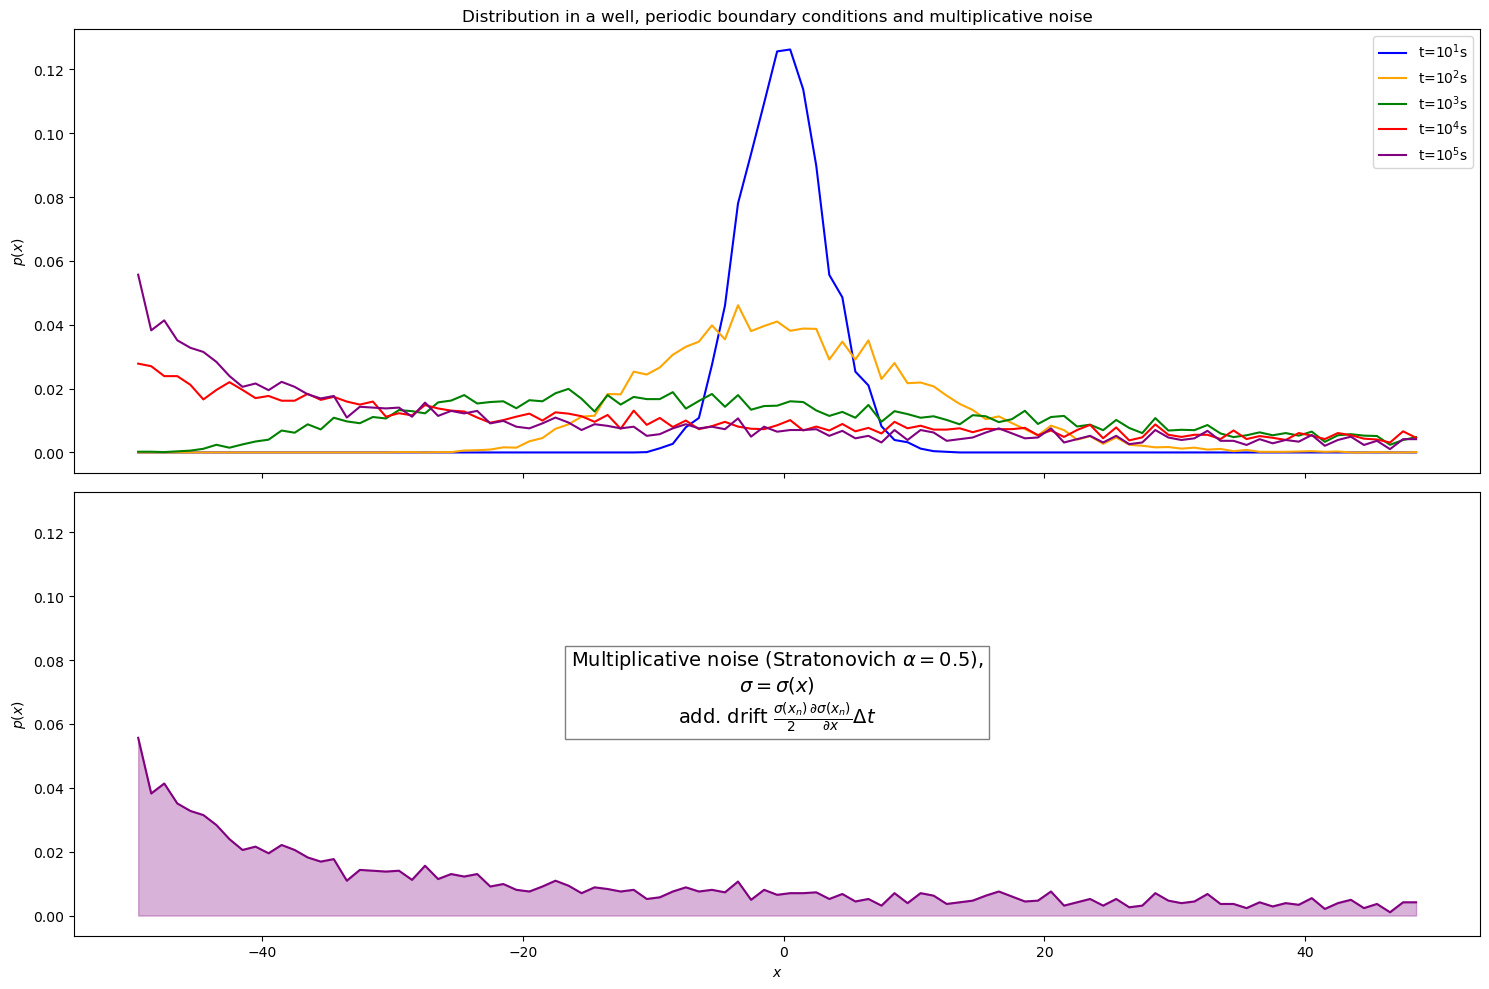

In [20]:
l = np.arange(100) - 50
h10 = np.histogram(results[0, :], l, density=True)
h100 = np.histogram(results[1, :], l, density=True)
h1000 = np.histogram(results[2, :], l, density=True)
h10000 = np.histogram(results[3, :], l, density=True)
h100000 = np.histogram(results[4, :], l, density=True)

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot for the first subplot
axs[0].plot(h10[1][:-1] + 1/2, h10[0], color='blue')
axs[0].plot(h100[1][:-1] + 1/2, h100[0], color='orange')
axs[0].plot(h1000[1][:-1] + 1/2, h1000[0], color='green')
axs[0].plot(h10000[1][:-1] + 1/2, h10000[0], color='red')
axs[0].plot(h100000[1][:-1] + 1/2, h100000[0], color='purple')

axs[0].legend(['t=$10^1$s', 't=$10^2$s', 't=$10^3$s', 't=$10^4$s', 't=$10^5$s'])
axs[0].set_ylabel('$p(x)$')
axs[0].set_title('Distribution in a well, periodic boundary conditions and multiplicative noise')

# Plot for the second subplot with filled area
axs[1].plot(h100000[1][:-1] + 1/2, h100000[0], color='purple')
axs[1].fill_between(h100000[1][:-1] + 1/2, h100000[0], color='purple', alpha=0.3)
axs[1].set_ylabel('$p(x)$')
axs[1].set_xlabel('$x$')
axs[1].set_ylim(axs[0].get_ylim())
axs[1].text(0.5, 0.65, r'Multiplicative noise (Stratonovich $\alpha = 0.5$),' + '\n' + 
           r'$\sigma = \sigma(x)$' + '\n' +
           r'add. drift $\frac{\sigma(x_n)}{2} \frac{\partial\sigma(x_n)}{\partial x}\Delta t$', 
           transform=axs[1].transAxes,
           verticalalignment='top', horizontalalignment='center', color='black',
           fontsize=14, bbox=dict(facecolor='white', alpha=0.5))


plt.tight_layout()
plt.show()

b. Set $\alpha = 1$ (the anti-Itô integral) and plot the probability distribution after $T = 10,10^2, 10^3, 10^4,$ and $10^5$ s. Compare your results with figure 7.3(g)–(h).

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

A = 7
steps = 10**A+1         # Number of iterations 
N = 10000
x = np.zeros((1,N))          # Pre allocation of the positions
L = 100

# from multiplicative noise
sigma0 = 1
sigma = 1.8
beta = sigma/L
dt = 0.01
dtt = np.sqrt(dt)
results = np.zeros((5,N))

# for noise induced drift
alpha = 1.0
f1 = dt*alpha*sigma0*sigma/L
f2 = dt*alpha*sigma*sigma/(L*L)

counter = 0
for i in trange(steps):
    x = x + f1 + f2 * x + (sigma0 + beta * x) * np.random.choice([-dtt, dtt], size=(1,N))
    x = np.where(x > L, 2*L-x, x)
    x = np.where(x < -L, -2*L-x, x) 
    
    if i in [10**(A-4),10**(A-3),10**(A-2),10**(A-1),10**(A)]:
        results[counter, :] = x
        counter += 1                
    

100%|██████████| 10000001/10000001 [16:26<00:00, 10133.24it/s]


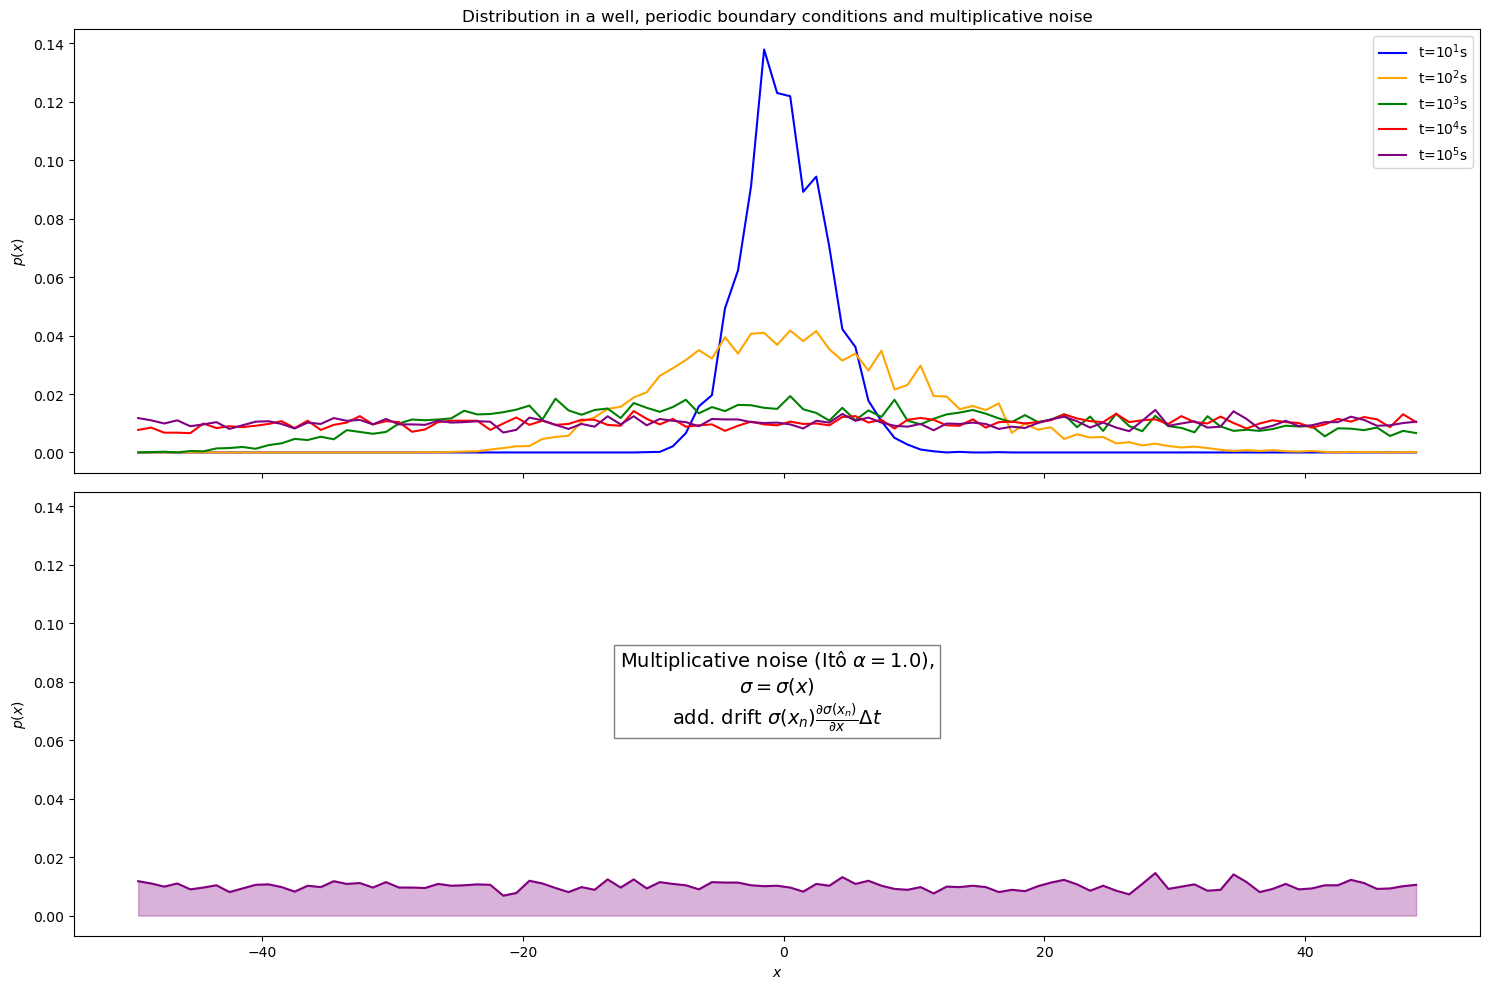

In [23]:
l = np.arange(100) - 50
h10 = np.histogram(results[0, :], l, density=True)
h100 = np.histogram(results[1, :], l, density=True)
h1000 = np.histogram(results[2, :], l, density=True)
h10000 = np.histogram(results[3, :], l, density=True)
h100000 = np.histogram(results[4, :], l, density=True)

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot for the first subplot
axs[0].plot(h10[1][:-1] + 1/2, h10[0], color='blue')
axs[0].plot(h100[1][:-1] + 1/2, h100[0], color='orange')
axs[0].plot(h1000[1][:-1] + 1/2, h1000[0], color='green')
axs[0].plot(h10000[1][:-1] + 1/2, h10000[0], color='red')
axs[0].plot(h100000[1][:-1] + 1/2, h100000[0], color='purple')

axs[0].legend(['t=$10^1$s', 't=$10^2$s', 't=$10^3$s', 't=$10^4$s', 't=$10^5$s'])
axs[0].set_ylabel('$p(x)$')
axs[0].set_title('Distribution in a well, periodic boundary conditions and multiplicative noise')

# Plot for the second subplot (same as the last histogram)
axs[1].plot(h100000[1][:-1] + 1/2, h100000[0], color='purple')
axs[1].fill_between(h100000[1][:-1] + 1/2, h100000[0], color='purple', alpha=0.3)
axs[1].set_ylabel('$p(x)$')
axs[1].set_xlabel('$x$')
axs[1].set_ylim(axs[0].get_ylim())
axs[1].text(0.5, 0.65, r'Multiplicative noise (Itô $\alpha = 1.0$),'+ '\n' + 
           r'$\sigma = \sigma(x)$' + '\n' +
           r'add. drift $\sigma(x_n) \frac{\partial\sigma(x_n)}{\partial x}\Delta t$', 
           transform=axs[1].transAxes,
           verticalalignment='top', horizontalalignment='center', color='black',
           fontsize=14, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

c) In the light of your results, which convention works best to reproduce the equilibrium distribution (i.e., the Boltzmann distribution)?

The Itô integral since it represents the equlibrium distribution after much time.